In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import math
import cv2
import os
from os.path import isfile, join

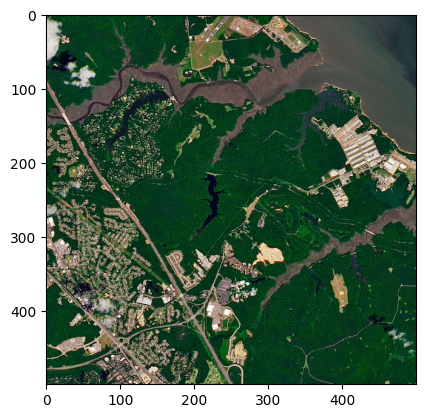

In [2]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])
def cut_image(img,x,y,t1,t2):
    return img[x:t1+x,y:t2+y,:]
img=plt.imread("./tp3.jpg")
img=cut_image(img,0,0,500,500)
plt.imshow(img)
gray_img=rgb2gray(img)

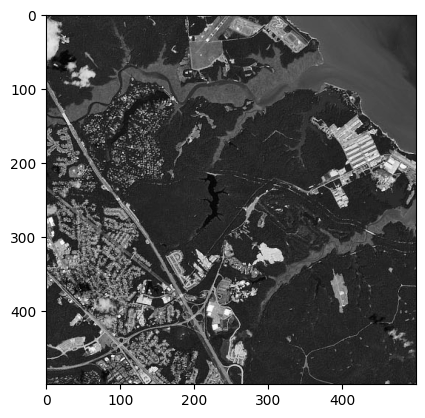

In [3]:
plt.imshow(gray_img,cmap="gray")

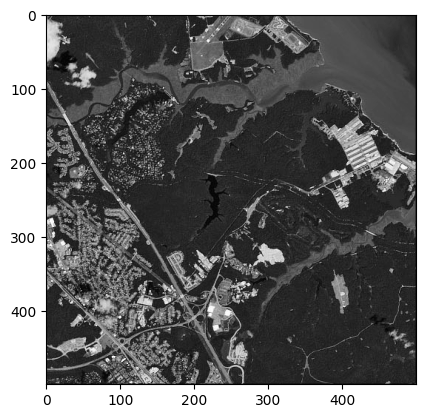

In [4]:
def gauss(x,y,sigma=0.01):
    return (((1)/(2*np.pi*sigma**2))*(np.exp(-(x**2+y**2)/(2*sigma**2))))


def gauss_filter(shape=(3,3)):
    a=np.ones(shape)

    for x in range(a.shape[0]):
        for y in range(a.shape[1]):
   
            a[x][y]=gauss(x,y,0.1)
    return a


def filter_img(img):
    n=img.shape[0]
    m=img.shape[1]
    a=img.copy()
    filter=gauss_filter()

    for x in range(1,n-1):
        for y in range(1,m-1):
            
            a[x][y]=np.round(np.mean(np.multiply(img[x-1:x+2,y-1:y+2],filter)))
       
    return a
gray_filterd_img=filter_img(gray_img)
plt.imshow(gray_filterd_img,cmap="gray")

<h2>First Order Filters:</h2>

<h4>Robert Filter</h4>

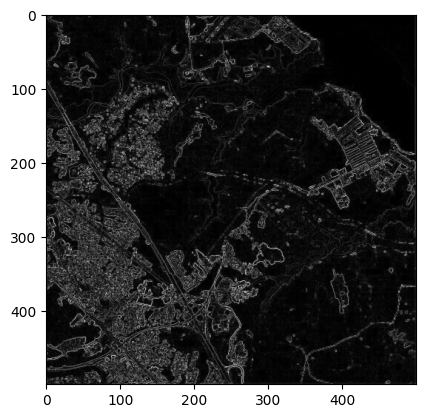

In [5]:
#function to convole the image with a filter
def convolve(img,filter):
    x_filter=filter.shape[0]
    y_filter=filter.shape[0]
    cp=img.copy()
    n=img.shape[0]
    m=img.shape[1]
    for x in range(x_filter%2,n-(x_filter//2)):
        for y in range(y_filter%2,m-(y_filter//2)):
        
           
            tmp=np.sum((img[x-x_filter%2:(x+x_filter//2)+1,y-y_filter%2:y+(y_filter//2)+1])*filter)
            if(tmp>255):

                cp[x][y]=255
            else:
                cp[x][y]=tmp


    return cp

def amplitude(gx,gy):
    return np.sqrt(gx**2+gy**2) 
def angle(gx,gy):
    return np.arctan2(-gx,gy)

gx_filter=np.array([[1,0],[0,-1]])
gy_filter=np.array([[0,1],[-1,0]])
laplacien_filter=np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
g=convolve(gray_filterd_img,laplacien_filter)

gx=convolve(gray_filterd_img,gx_filter)
gy=convolve(gray_filterd_img,gy_filter)


G=amplitude(gx,gy)
O=angle(gx,gy)

plt.imshow(G,cmap="gray")

In [6]:
def seuillage(img,seuil=120):
    cp=img.copy()
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            if(img[x][y]>=seuil):
                cp[x][y]=255
            else:
                cp[x][y]=0
    return cp

s=seuillage(g)
                    
    

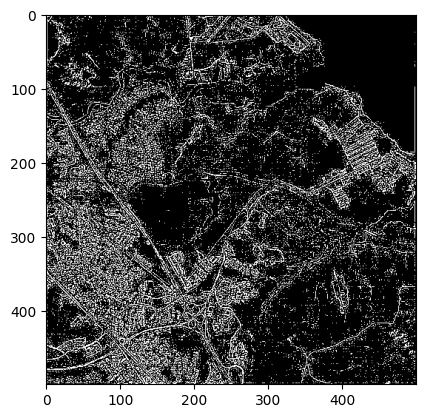

In [7]:
plt.imshow(s,cmap="gray")


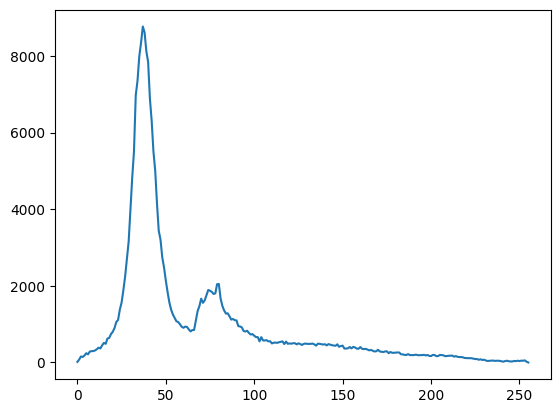

In [8]:
histogram, bin_edges = np.histogram(gray_img, bins=256, range=(0, 256))
plt.plot(bin_edges[0:-1], histogram)


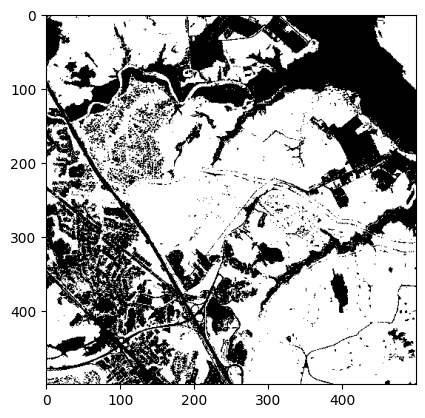

In [9]:
def segmentation(img,thresh_down,thresh_up):
    cp=img.copy()
    for x in range(cp.shape[0]):
        for y in range(cp.shape[1]):
            if(cp[x][y]<thresh_up and cp[x][y]>thresh_down):
                cp[x][y]=255
            else:
                cp[x][y]=0
    return cp

segmented_image1=segmentation(gray_img,0,62)
segmented_image2=segmentation(gray_img,60,100)
segmented_image3=segmentation(gray_img,100,255)
plt.imshow(segmented_image1,cmap="gray") 

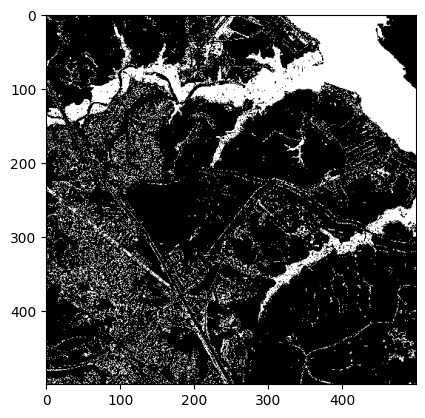

In [10]:
plt.imshow(segmented_image2,cmap="gray")   

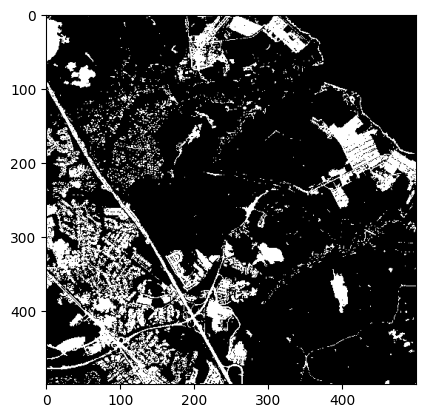

In [11]:
plt.imshow(segmented_image3,cmap="gray")   

<h3>Otsu’s method</h3>

In [12]:

def wc1(h,thresh):
    return np.sum([h[i] for i in range(0,thresh)])
def wp1(h,thresh):
    return np.sum([h[i] for i in range(0,thresh)])/250000

def mean1(h,thresh):
    w=wc1(h,thresh)
    
    if(w==0):
        return 0
    return (1/w)*(np.sum([h[i]*i for i in range(0,thresh)]))


def variance1(h,thresh):
    w=wc1(h,thresh)
    if(w==0):
        return 0
    return (1/w)*(np.sum([np.square(i-mean1(h,thresh))*h[i] for i in range(0,thresh)]))



def wc2(h,thresh):
    return np.sum([h[i] for i in range(thresh,256)])
def wp2(h,thresh):
    return np.sum([h[i] for i in range(thresh,256)])/250000


def mean2(h,thresh):
    w=wc2(h,thresh)
    if(w==0):
        return 0

  
    return (1/w)*(np.sum([h[i]*i for i in range(thresh,256)]))


def variance2(h,thresh):
    w=wc2(h,thresh)
    if(w==0):
        return 0
   
    return (1/w)*np.sum([np.square(i-mean2(h,thresh))*h[i] for i in range(thresh,256)])




arr=[]

for i in range(1,256):
    temp=wp1(histogram,i)*variance1(histogram,i)+wp2(histogram,i)*variance2(histogram,i)
    
    arr.append(temp)
arr=np.array(arr)
print(np.argmin(arr))   

97


In [34]:

def k_mediods(k,img):
    arr1=[]
    arr2=[]
    cp=img.copy()
    n=img.shape[0]
    m=img.shape[1]
    c1x=np.random.randint(0,n)
    c1y=np.random.randint(0,m)
    c2x=np.random.randint(0,n)
    c2y=np.random.randint(0,m)
    c1=img[c1x,c1y]
    c2=img[c2x,c2y]
    cost=0
    prev_cost=0
    
    while(cost-prev_cost<0):
        for x in range(n):
            for y in range(m):
                if(x!=c1x and x!=c2x and x!=c2x and y!=c2y):
                    index=np.argmin([img[x][y]-c1,img[x][y]-c2])
                    mins=np.min([img[x][y]-c1,img[x][y]-c2])
                    if(index==0):
                        arr1.append((x,y,mins))
                    else:
                        arr2.append((x,y,mins))    
        cost=np.sum([])
    
k_mediods(2,img)


    

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (0, 16), (0, 17), (0, 18), (0, 19), (0, 20), (0, 21), (0, 22), (0, 23), (0, 24), (0, 25), (0, 26), (0, 27), (0, 28), (0, 29), (0, 30), (0, 31), (0, 32), (0, 33), (0, 34), (0, 35), (0, 36), (0, 37), (0, 38), (0, 39), (0, 40), (0, 41), (0, 42), (0, 43), (0, 44), (0, 45), (0, 46), (0, 47), (0, 48), (0, 49), (0, 50), (0, 51), (0, 52), (0, 53), (0, 54), (0, 55), (0, 60), (0, 61), (0, 62), (0, 63), (0, 64), (0, 65), (0, 66), (0, 67), (0, 68), (0, 69), (0, 70), (0, 71), (0, 72), (0, 73), (0, 74), (0, 75), (0, 76), (0, 77), (0, 78), (0, 79), (0, 80), (0, 81), (0, 82), (0, 83), (0, 84), (0, 85), (0, 86), (0, 87), (0, 88), (0, 89), (0, 90), (0, 91), (0, 92), (0, 93), (0, 94), (0, 95), (0, 96), (0, 97), (0, 98), (0, 99), (0, 100), (0, 101), (0, 102), (0, 103), (0, 104), (0, 105), (0, 106), (0, 107), (0, 108), (0, 109), (0, 110), (0, 111), (0, 112), (0, 113), (0, 114), (0, 115), (0, 116),

In [46]:
arr=[[1,2,3],[4,5,6]]
arr=np.array(arr)
arr[:,0]

array([1, 4])

https://en.wikipedia.org/wiki/Otsu%27s_method


https://vincmazet.github.io/bip/segmentation/histogram.html



https://www.geeksforgeeks.org/ml-k-medoids-clustering-with-example/